In [221]:
import sys
import matplotlib.pyplot as plt
import numpy as np
import copy
from PIL import Image

In [222]:
with open("../Data/skyline.txt") as file:
    raw_skyline = file.read()

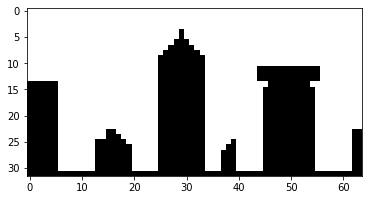

In [223]:
skyline = raw_skyline.split('\n')
skyline = np.asarray([np.asarray([int(x) for x in row.split('\t')]) for row in skyline])
plt.imshow(skyline, cmap='gray')

In [224]:
with open("../Data/horizontal_wind.txt") as file:
    raw_hor_wind = file.read()
with open("../Data/vertical_wind.txt") as file:
    raw_ver_wind = file.read()

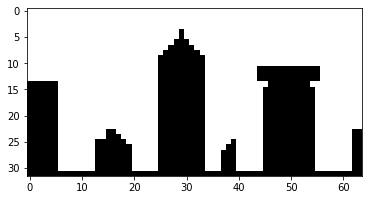

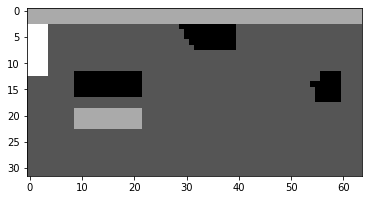

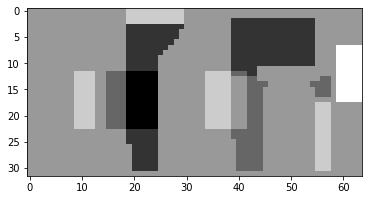

In [225]:
hor_wind = np.asarray([np.asarray([int(x) for x in row.split('\t')]) for row in raw_hor_wind.split('\n')])

vert_wind = np.asarray([np.asarray([int(x)+3 for x in row.split('\t')]) for row in raw_ver_wind.split('\n')])
# n_im = np.asarray([skyline, vert_wind, hor_wind])

plt.imshow(skyline, cmap='gray')
plt.pause(0.01)
plt.imshow(hor_wind, cmap='gray')
plt.pause(0.01)
plt.imshow(vert_wind, cmap='gray')

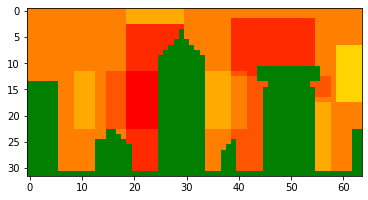

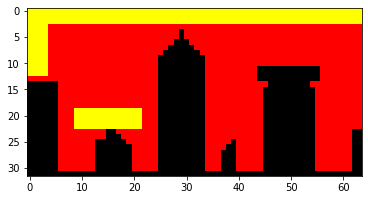

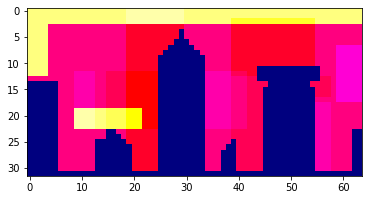

In [226]:
v_im = [[[] for i in range(64)] for j in range(32)]
h_im = copy.deepcopy(v_im)
t_im = copy.deepcopy(v_im)
p_im = copy.deepcopy(v_im)

for i in range(32):
    for j in range(64):
        p_im[i][j] = [skyline[i][j], 0, 0]
        v_im[i][j] = [skyline[i][j], vert_wind[i][j]/6, 0]
        h_im[i][j] = [skyline[i][j], (hor_wind[i][j]/1)*2, 0]
        t_im[i][j] = [skyline[i][j], hor_wind[i][j]/1, vert_wind[i][j]/6]

plt.imshow(v_im)
plt.pause(0.01)
plt.imshow(h_im)
plt.pause(0.01)
plt.imshow(t_im)

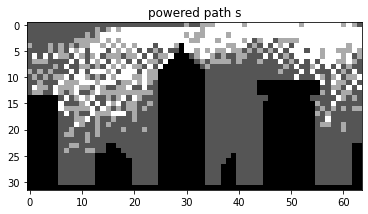

In [227]:
t_im = np.asarray(t_im)
with open("../Data/powered_flight.txt") as file:
    path = file.read()

s_path = [[int(xy.split('\t')[0]), int(xy.split('\t')[1])] for xy in path.split('\n')]
s_prime_path = [[int(xy.split('\t')[4]), int(xy.split('\t')[5])] for xy in path.split('\n')]


path_img = copy.deepcopy(skyline)

for x, y in s_path:
    try:
        path_img[x-1][y-1] += 1
    except IndexError:
        print(x, y)
        print(t_im.shape)
        sys.exit(1)

plt.title("powered path s")
plt.imshow(path_img, cmap='gray')
plt.pause(0.01)
path_img = copy.deepcopy(p_im)

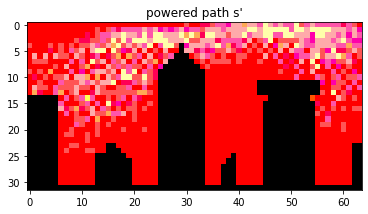

In [228]:
for x, y in s_path:
    path_img[x-1][y-1][2] += 1/3

for x, y in s_prime_path:
    try:
        path_img[x-1][y-1][1] += 1/3
    except IndexError:
        print(x, y)
        print(t_im.shape)
        sys.exit(1)

plt.title("powered path s'")
plt.imshow(path_img)